In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import preprocessing
import statsmodels.api as sma
from matplotlib.ticker import NullFormatter

In [89]:
def split_trainingData(predictors,target,train_percentage):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, train_size=train_percentage)
    return X_train, X_test, Y_train, Y_test

In [90]:
def predictors_target(data_Train):
    """
    Split the predictors from target values in training dataset
    
    :param training Dataset
    """
    
    predictors = data_Train.iloc[:,1:12]
    target = data_Train.iloc[:,12]
    
    return predictors, target

In [91]:
def predictors_test(data_Test):
    """
    Get the predictors in testing dataset
    
    :param testing Dataset
    """
    
    tsetPredictors = data_Test.iloc[:,1:12]
    
    return tsetPredictors

In [92]:
def writeCSV(ID,data,outputFile):
    """
    Write to a csv file
    
    :param ID -->id column 
    :param data -->data to write on a csv file
    :param outputFile --> output file name to write data
    """
    
    df=pd.DataFrame()
    df['Id']=ID
    df['quality']=data
    df.to_csv(outputFile,index=0)

In [93]:
def remove_outliers(predictors,target):
    """
    Remove the outliers by finding the studentized residuals after training model using ordinary lease squares method
    :param: predictors 
    :param: target
    """
    
    predictors=sma.add_constant(predictors)    
    lm2 = sm.OLS(target,predictors).fit()
    
    influence = lm2.get_influence()  
    resid_student = influence.resid_studentized_external
    
    resid = pd.concat([predictors,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
    resid = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
    
    # X_train = resid[resid.pH.notnull()]

    ind = resid.index
    target.drop(ind,axis = 0,inplace = True) 
    predictors.drop(ind,axis = 0,inplace = True)


    return [predictors,target]

In [94]:
def linear_regression(predictors,target):
    """
    Returns a trained linear regression model
    """
    
    lm = LinearRegression()
    lm = lm.fit(predictors,target) 
    
    return lm    

In [95]:
def redWine_regression(trained_model):
    
    redData_Train=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-red-training.csv")
    redData_Test=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-red-testing.csv")
    
    # Getting training and testing data for red wine
    predictors,target= predictors_target(redData_Train)
    testPredictors=predictors_test(redData_Test)

   # trained_model.fit(predictors,target)
    Y_pred_test= trained_model.predict(testPredictors)
    
    # Writing Prerdiction to a csv file
    outputFile='winequality-red-solution.csv'
    writeCSV(redData_Test['Id'],Y_pred_test,outputFile)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RMSE:  0.7187295447034434


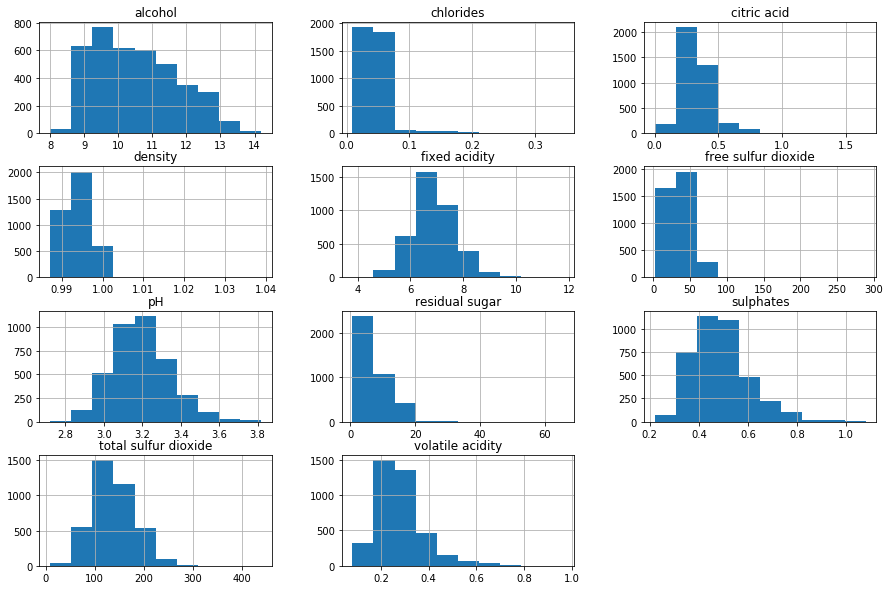

In [96]:
def main():
    """
    Main function
    :return:
    """
    # Load the csv file into pandas dataframe
    data_Samp=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-white-sample.csv")
    data_Train=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-white-training.csv")
    data_Test=pd.read_csv("C:/Users/Ali/Documents/GitHub/ECEN689-Fall2018/Challenges/4Files/winequality-white-testing.csv")
    
    # Split Training Data for Predictors and Target
    predictors,target= predictors_target(data_Train)
    
    #Plot Histograms of all data
    cols=list(predictors)
    predictors[cols].hist(figsize=(15,10));
    
    #Remove outliers
    predictors=sma.add_constant(predictors)    
    lm2 = sm.OLS(target,predictors).fit()
    influence = lm2.get_influence()  
    resid_student = influence.resid_studentized_external
    resid = pd.concat([predictors,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
    resid = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]
    ind = resid.index
    target.drop(ind,axis = 0,inplace = True) 
    predictors.drop(ind,axis = 0,inplace = True)
        
    # Split Training data into train and test datasets
    X_train, X_test, Y_train, Y_test= split_trainingData(predictors, target, 0.8)
    
    # Training a model. Change the Function Name for the model you want
    white_trained_model= linear_regression(X_train,Y_train)
    
    # Prediction on Validation Data
    Y_pred= white_trained_model.predict(X_test)
        
    # Calculating Accuracy on Validation data set
    res=Y_pred-Y_test
    # scatter_hist(Y_test,Y_pred)
    rmse=sqrt(mean_squared_error(Y_test,Y_pred))
    print("RMSE: ",rmse)
    
    # Prediction on Test Data
    predictors,target= predictors_target(data_Train)
    testPredictors=predictors_test(data_Test)
    white_trained_model=linear_regression(predictors,target)
    white_trained_model.fit(predictors,target)
    Y_pred_test= white_trained_model.predict(testPredictors)
    
    # Writing Prerdiction of Test data to a csv file
    outputFile='winequality-white-solution.csv'
    writeCSV(data_Test['Id'],Y_pred_test,outputFile)
    
    # Writing Co-efficients on a csv file.
    intercept=format(white_trained_model.intercept_)
    coefficients=white_trained_model.coef_
    co_ef=list()
    co_ef.append(intercept)
    for i in range(len(coefficients)):
        co_ef.append(coefficients[i])
    df = pd.DataFrame(np.array(co_ef))
    #df1.to_csv("winequality-white-intercept.csv",header=None, index=0)
    df.to_csv("winequality-white-parameters.csv",header=None, index=0)
    
    # Redwine Quality Regression
    # Challenge 3 function
    redWine_regression(white_trained_model)
    
   
    
if __name__ == "__main__":
    main()